<a href="https://colab.research.google.com/github/matheusmoura-stack/Project1/blob/main/Project_test001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTANDO BIBLIOTECAS E PACOTES PARA FACILITAÇÃO DA ANÁLISE**


In [ ]:
!pip install matplotlib
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
from google.colab import files
import plotly.graph_objects as go
import plotly.express as px
from google.colab import drive

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (18,10)

##**Importanto dados baixados pelo Google Drive e lendo o histórico de preços**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.read_excel('/content/drive/My Drive/Dados-Historicos.xlsx')

,Data,Rendimento Mensal Poupança,Rendimento Mensal CDI
0,2015-01-01,0.5882,0.93
1,2015-02-01,0.5169,0.82
2,2015-03-01,0.6302,1.04
3,2015-04-01,0.6079,0.95
4,2015-05-01,0.6159,0.98
...,...,...,...
82,2021-11-01,0.4412,0.59
83,2021-12-01,0.4902,0.77
84,2022-01-01,0.5608,0.73
85,2022-02-01,0.5000,0.76


##**Transformando em Data Frame e renomeando para fácil acesso**

In [ ]:
data_hist = pd.DataFrame(pd.read_excel('/content/drive/My Drive/Dados-Historicos.xlsx'))
data_hist['Data'] = pd.to_datetime(data_hist['Data'])

In [ ]:
data_hist

,Data,Rendimento Mensal Poupança,Rendimento Mensal CDI
0,2015-01-01,0.5882,0.93
1,2015-02-01,0.5169,0.82
2,2015-03-01,0.6302,1.04
3,2015-04-01,0.6079,0.95
4,2015-05-01,0.6159,0.98
...,...,...,...
82,2021-11-01,0.4412,0.59
83,2021-12-01,0.4902,0.77
84,2022-01-01,0.5608,0.73
85,2022-02-01,0.5000,0.76


In [ ]:
principal = 10000

##**Aplicando o rendimento diante da porcentagem estabelecida pelo mês de Janeiro**

In [ ]:
data_hist.loc[0: ,'Rendimento Poupança'] = principal + ( principal * data_hist.loc[0:, 'Rendimento Mensal Poupança'] / 100)
data_hist.loc[1: ,'Rendimento Poupança'] = 0

In [ ]:
data_hist.loc[:, 'Rendimento Poupança']

0     10058.82
1         0.00
2         0.00
3         0.00
4         0.00
        ...   
82        0.00
83        0.00
84        0.00
85        0.00
86        0.00
Name: Rendimento Poupança, Length: 87, dtype: float64

##**Aplicando rendimento para os outros mêses a partir do retorno de Janeiro com um for**

In [ ]:
for parcela in range(1, len(data_hist)):
    principal = data_hist.loc[parcela-1, 'Rendimento Poupança']
    data_hist.loc[parcela ,'Rendimento Poupança'] = principal + ( principal * data_hist.loc[parcela, 'Rendimento Mensal Poupança'] / 100)

In [ ]:
data_hist.loc[:, 'Rendimento Poupança']

0     10058.820000
1     10110.814041
2     10174.532391
3     10236.383373
4     10299.429258
          ...     
82    14244.589581
83    14314.416559
84    14394.691807
85    14466.665266
86    14553.118058
Name: Rendimento Poupança, Length: 87, dtype: float64

In [ ]:
data_hist

,Data,Rendimento Mensal Poupança,Rendimento Mensal CDI,Rendimento Poupança
0,2015-01-01,0.5882,0.93,10058.820000
1,2015-02-01,0.5169,0.82,10110.814041
2,2015-03-01,0.6302,1.04,10174.532391
3,2015-04-01,0.6079,0.95,10236.383373
4,2015-05-01,0.6159,0.98,10299.429258
...,...,...,...,...
82,2021-11-01,0.4412,0.59,14244.589581
83,2021-12-01,0.4902,0.77,14314.416559
84,2022-01-01,0.5608,0.73,14394.691807
85,2022-02-01,0.5000,0.76,14466.665266


##**Gráfico mostrando o lucro ganho e dando uma perspectiva otimista sobre os próximos retornos**

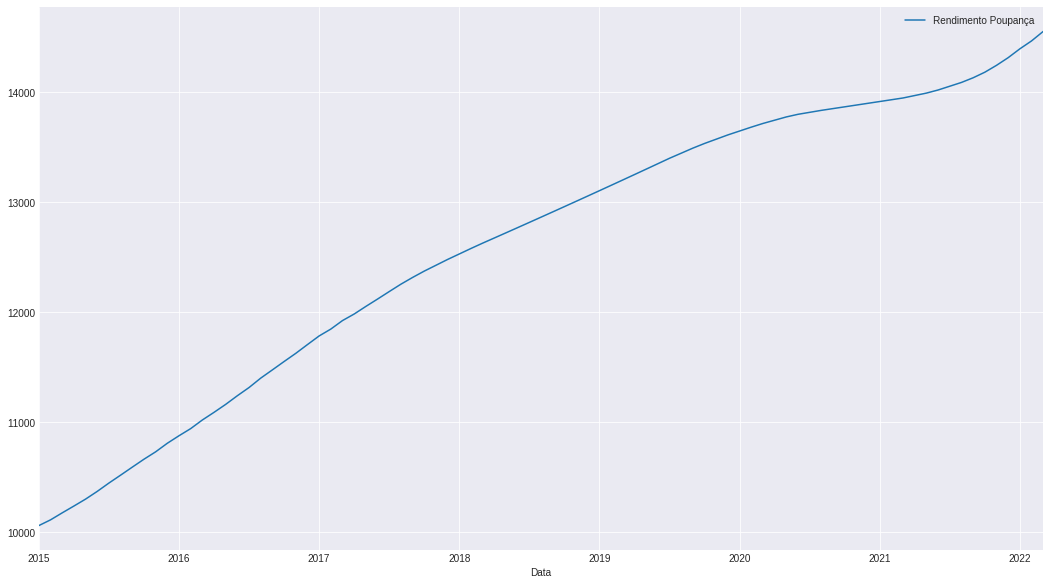

In [ ]:
data_hist[['Rendimento Poupança', 'Data']].plot(x = 'Data', y = 'Rendimento Poupança')

In [ ]:
principal = 10000

In [ ]:
data_hist.loc[0 ,'Rendimento CDI'] = principal + ( principal * data_hist.loc[0, 'Rendimento Mensal CDI'] / 100)
data_hist.loc[1: ,'Rendimento CDI'] = 0
data_hist.loc[:, 'Rendimento CDI']

0     10093.0
1         0.0
2         0.0
3         0.0
4         0.0
       ...   
82        0.0
83        0.0
84        0.0
85        0.0
86        0.0
Name: Rendimento CDI, Length: 87, dtype: float64

In [ ]:
for parcela in range(1, len(data_hist)):
    principal = data_hist.loc[parcela-1, 'Rendimento CDI']
    data_hist.loc[parcela ,'Rendimento CDI'] = principal + ( principal * data_hist.loc[parcela, 'Rendimento Mensal CDI'] / 100)

In [ ]:
data_hist.loc[:, 'Rendimento CDI']

0     10093.000000
1     10175.762600
2     10281.590531
3     10379.265641
4     10480.982444
          ...     
82    17040.847421
83    17172.061946
84    17297.417998
85    17428.878375
86             NaN
Name: Rendimento CDI, Length: 87, dtype: float64

In [ ]:
data_hist

,Data,Rendimento Mensal Poupança,Rendimento Mensal CDI,Rendimento Poupança,Rendimento CDI
0,2015-01-01,0.5882,0.93,10058.820000,10093.000000
1,2015-02-01,0.5169,0.82,10110.814041,10175.762600
2,2015-03-01,0.6302,1.04,10174.532391,10281.590531
3,2015-04-01,0.6079,0.95,10236.383373,10379.265641
4,2015-05-01,0.6159,0.98,10299.429258,10480.982444
...,...,...,...,...,...
82,2021-11-01,0.4412,0.59,14244.589581,17040.847421
83,2021-12-01,0.4902,0.77,14314.416559,17172.061946
84,2022-01-01,0.5608,0.73,14394.691807,17297.417998
85,2022-02-01,0.5000,0.76,14466.665266,17428.878375


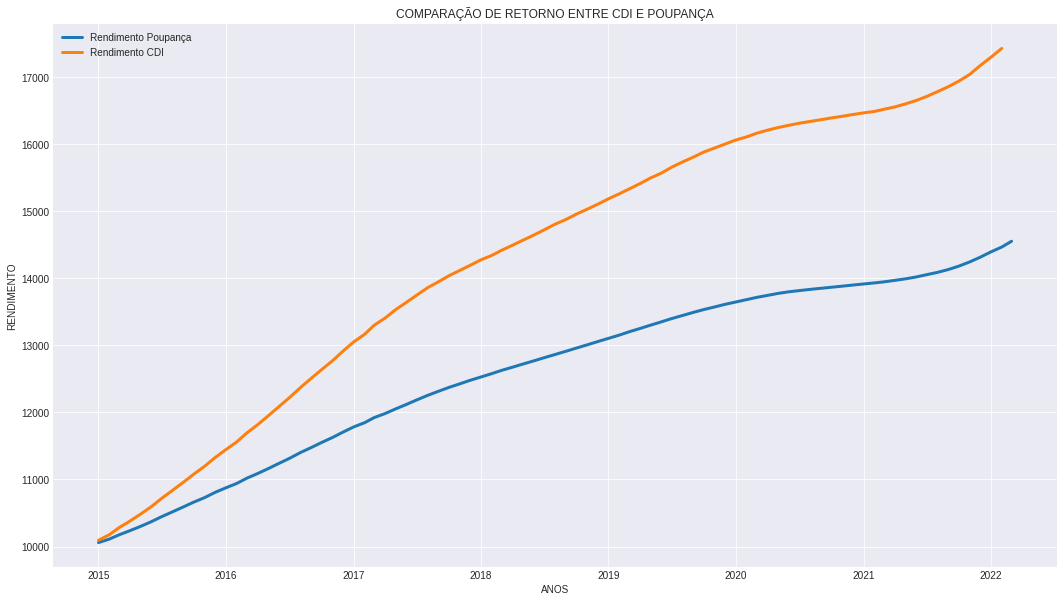

In [ ]:
plt.title('COMPARAÇÃO DE RETORNO ENTRE CDI E POUPANÇA')
plt.ylabel('RENDIMENTO')
plt.xlabel('ANOS')
plt.plot(data_hist['Data'], data_hist['Rendimento Poupança'], label = 'Rendimento Poupança',linewidth=3.0)
plt.plot(data_hist['Data'],data_hist['Rendimento CDI'], label = 'Rendimento CDI',linewidth=3.0)
plt.legend()